<a href="https://colab.research.google.com/github/solobala/CVML10/blob/main/CVML10_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_hogdescriptor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOGDescriptor

https://docs.opencv.org/2.4/modules/gpu/doc/object_detection.html

In [2]:
import cv2
import numpy as np
print(cv2.__version__)

4.8.0


## Загружаем исходные данные

In [4]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))

## Задаем параметры для вычисления дескриптора

In [5]:
# Дескриптор - вектор описания харакетрных точек
winSize = (28,28) # РАзмер окна
blockSize = (14,14) # Размер блока
blockStride = (14,14) # Размер шага в блоке
cellSize = (7,7) # Размер ячейки
nbins = 9 # кол-во бинов
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01 # Порог отсечения по расстоянию L2
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels)

## Вычисляем дескриптор для изображения

In [6]:
# Это дескриптор для изображения с индексом 0
descriptor = hog.compute(np.uint8(train_img[0]))
print('Descriptor size: %d' % len(descriptor))

Descriptor size: 144


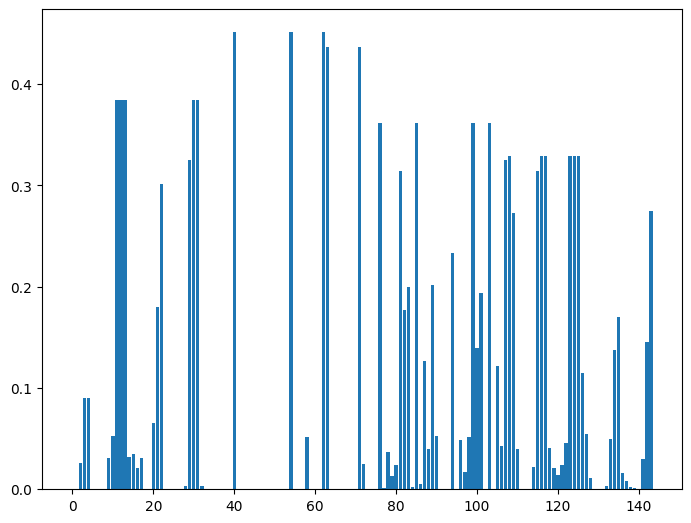

In [7]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(len(descriptor)), descriptor.reshape(-1))
plt.show()